In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
red = pd.read_csv('data/winequality-red.csv', sep = ';')
white = pd.read_csv('data/winequality-white.csv', sep = ';')

In [ ]:
red.describe()
# need to rename the columns
# mean quality = 5.6

In [ ]:
white.describe()
# mean quality 5.9

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Create a figure 
fig, ax = plt.subplots(figsize=(8, 4))
 
# Plot the KDEs for red and white in the same subplot
sns.kdeplot(data=red.quality, ax=ax, color='red', shade=True, label='Red')
sns.kdeplot(data=white.quality, ax=ax, color='yellow', shade=True, label='White')


# Set the title and axis labels for the subplot
ax.set_title('Distribution of Quality')
ax.set_xlabel('Rating')
ax.set_ylabel('Density')

# Add a legend for the KDEs
ax.legend()

# Show the plot
plt.show()


In [ ]:
red.corr()

In [ ]:
# RED WINE

fig, ax = plt.subplots(figsize=(18, 9))

sns.heatmap(red.corr(), annot=True)


# 0.5 alcohol & quality
# -0.4 volatile acidity & quality


# -0.7 ph & volatile acidity
# 0.7 citric acid & volatile acidity 
# 0.7 density & volatile acidity
# -0.5 ph & citric acid
# 0.67 free sulfur dioxide & total sulfur dioxide


In [ ]:
# WHITE WINE

fig, ax = plt.subplots(figsize=(18, 9))

sns.heatmap(white.corr(), annot=True)

# 0.44 alcohol & quality


# -0.78 density & alcohol
# 0.84 density & residual sugar
# 0.53 density & total sulfur dioxide
# 0.62 free sulfur dioxide & total sulfur dioxide
# 0.43 ph & fixed acidity

In [ ]:
sns.histplot(red)

# Look at descriptive statistics

In [8]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
red_without_nan.describe()

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,citric_acid,alcohol,quality
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,8.307795,0.528476,2.370433,0.080777,15.718504,45.732677,0.996666,3.316236,0.644717,0.265031,10.444816,5.628346
std,1.744448,0.178690,0.792079,0.019578,10.038210,31.443402,0.001834,0.149317,0.134993,0.191708,1.065707,0.816776
min,4.600000,0.120000,0.900000,0.034000,1.000000,6.000000,0.990070,2.860000,0.330000,0.000000,8.400000,3.000000
25%,7.100000,0.390000,1.900000,0.070000,7.000000,22.000000,0.995553,3.220000,0.550000,0.090000,9.500000,5.000000
50%,7.900000,0.520000,2.200000,0.079000,13.500000,37.500000,0.996680,3.310000,0.620000,0.250000,10.200000,6.000000
75%,9.200000,0.640000,2.600000,0.089000,21.000000,61.000000,0.997800,3.407500,0.720000,0.420000,11.100000,6.000000
max,15.600000,1.240000,6.100000,0.176000,57.000000,165.000000,1.003200,3.900000,1.220000,0.790000,14.000000,8.000000


array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'residual_sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'total_sulfur_dioxide'}>],
       [<AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>],
       [<AxesSubplot:title={'center':'citric_acid'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

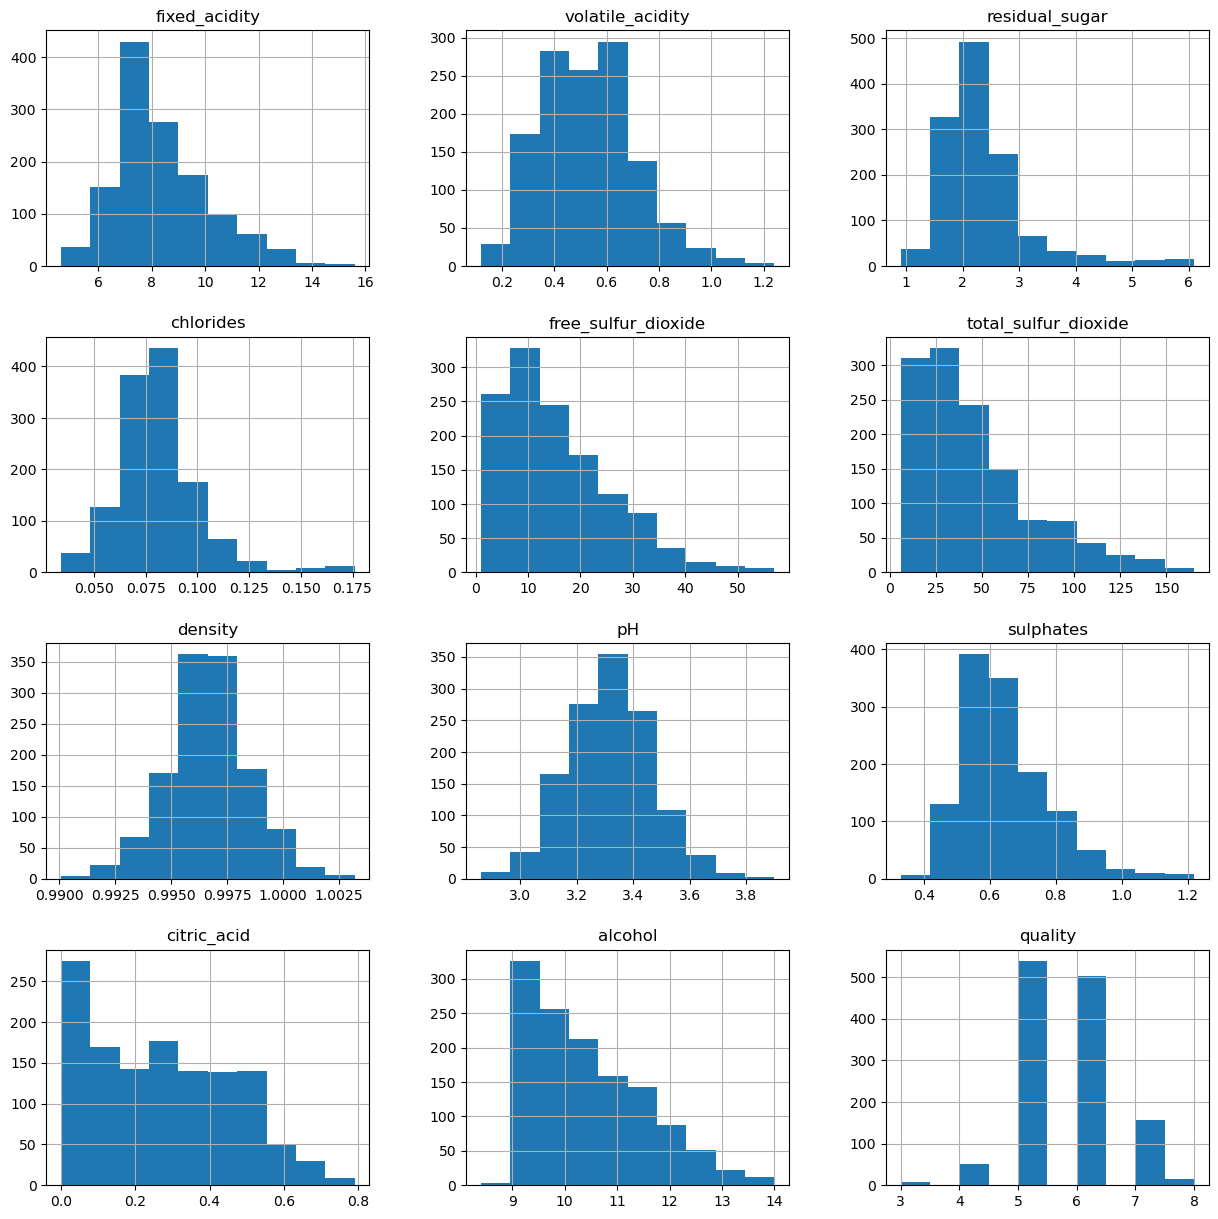

In [19]:
red_without_nan.hist(figsize = (15,15))

# Look at distributions

In [ ]:
# r
sns.histplot(red['fixed acidity'], kde=True, color = 'red')

In [ ]:
sns.histplot(white['fixed_acidity'], kde=True, color = 'lightblue')

In [ ]:
red.hist(figsize = (15,15))

# Clean the data

## Rename columns

In [3]:
#function to rename the column names 
def rename_columns(x):
    x.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity', "citric acid":"citric_acid", 
                          'residual sugar':'residual_sugar', "free sulfur dioxide":"free_sulfur_dioxide",
                      "total sulfur dioxide":"total_sulfur_dioxide", }, inplace=True )
    return x

In [10]:
rename_columns(red) #running the function above
rename_columns(white) #running the function above

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Find duplicates

In [ ]:
red.shape

In [ ]:
test_red.shape

In [4]:
red = red.drop_duplicates()

In [ ]:
white.shape

In [5]:
white = white.drop_duplicates()

## Find & Drop NaN

In [ ]:
# red_concatenated[red_concatenated.isna().any(axis=1)]


In [17]:
red_without_nan = red_concatenated.dropna()

In [33]:
white_without_nan = white_concatenated.dropna()

In [32]:
white_concatenated[white_concatenated.isna().any(axis=1)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
40,6.7,0.23,0.39,2.5,NaN,63.0,158.0,0.99370,3.11,0.36,9.40,6
41,6.7,0.24,0.39,2.9,NaN,63.0,157.0,0.99370,3.10,0.34,9.40,6
54,6.8,0.20,0.59,0.9,NaN,38.0,132.0,0.99300,3.05,0.38,9.10,6
194,6.4,0.29,0.44,3.6,NaN,75.0,181.0,0.99420,3.02,0.41,9.10,5
195,6.4,0.30,0.45,3.5,NaN,76.0,180.0,0.99420,3.02,0.39,9.10,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4794,6.0,0.32,0.30,7.3,NaN,46.0,159.0,0.99519,3.18,0.49,9.40,5
4813,5.8,0.36,0.50,1.0,NaN,63.0,178.0,0.99212,3.10,0.45,9.70,5
4815,6.2,NaN,0.01,3.2,0.041,18.0,120.0,0.99026,3.20,0.94,13.70,7
4845,6.6,0.38,0.29,2.4,NaN,15.0,93.0,0.99336,3.18,0.60,9.50,5


In [22]:
white.isnull().values.any()

False

In [35]:
white_without_nan.isnull().values.any()

False

## Get rid of the outliers

## Check for outliers

In [ ]:
red.columns

In [ ]:
plt.boxplot(red.fixed_acidity)

In [ ]:
plt.boxplot(red.fixed_acidity)

In [ ]:
plt.boxplot(red.volatile_acidity)

In [ ]:
plt.boxplot(red.volatile_acidity)

In [ ]:
plt.boxplot(red.citric_acid)

In [ ]:
plt.boxplot(red.residual_sugar)

In [ ]:
plt.boxplot(red.chlorides)

In [ ]:
plt.boxplot(red.free_sulfur_dioxide)

In [ ]:
plt.boxplot(red.total_sulfur_dioxide)

In [ ]:
plt.boxplot(red.density)

In [ ]:
plt.boxplot(red.pH)

In [ ]:
plt.boxplot(red.sulphates)

In [ ]:
plt.boxplot(red.alcohol)

In [ ]:
plt.boxplot(red.quality)

In [21]:
red_without_nan.to_csv('data/red_cleaned_final.csv')

In [36]:
white_without_nan.to_csv('data/white_cleaned_final.csv')

In [ ]:
red.columns

In [11]:
red_1 = red.drop(['citric_acid', 'alcohol', 'quality'], axis = 1)

In [ ]:
red_1

In [23]:
white_1 = white.drop(['alcohol', 'quality'], axis = 1)

In [12]:
red_2 = red.drop(['fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                  'total_sulfur_dioxide', 'density', 'pH', 'sulphates'], axis = 1)

In [ ]:
red_2

In [24]:
white_2 = white.drop(['citric_acid','fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                  'total_sulfur_dioxide', 'density', 'pH', 'sulphates'], axis = 1)

In [13]:
from scipy.stats import iqr
def remove_outliers(df):
    for c in df.columns:
            pct_95 = np.percentile(df[c], 95)
            pct_5 = np.percentile(df[c], 5)
            upper_bound = pct_95 + 1.9*iqr(df[c])
            lower_bound = pct_5 - 1.9*iqr(df[c])
            condition = (df[c] < upper_bound) & (df[c] > lower_bound)
            df[c] = df[c][condition]  # Filter out the outliers
    return df

In [14]:
red_1 = remove_outliers(red_1)

In [25]:
white_1 = remove_outliers(white_1)

In [15]:
red_concatenated = pd.concat([red_1, red_2], axis = 1)

In [26]:
white_concatenated = pd.concat([white_1, white_2], axis = 1)

In [16]:
red_concatenated

,fixed_acidity,volatile_acidity,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,citric_acid,alcohol,quality
0,7.4,0.700,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,0.00,9.4,5
1,7.8,0.880,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,0.00,9.8,5
2,7.8,0.760,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,0.04,9.8,5
3,11.2,0.280,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,0.56,9.8,6
5,7.4,0.660,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,0.00,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,0.08,9.5,6
1594,6.2,0.600,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,0.08,10.5,5
1595,5.9,0.550,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,0.10,11.2,6
1597,5.9,0.645,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,0.12,10.2,5


In [30]:
white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [29]:
white_concatenated.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3956.000000,3939.000000,3941.000000,3959.000000,3859.000000,3948.000000,3958.000000,3959.000000,3961.000000,3952.000000,3961.000000,3961.000000
mean,6.833506,0.277616,0.331276,5.893205,0.042855,34.563070,137.006822,0.993774,3.195458,0.489178,10.589358,5.854835
std,0.850068,0.095649,0.114075,4.751245,0.011490,16.051916,42.593696,0.002803,0.151546,0.110940,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991615,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,8.800000,0.049000,45.000000,166.000000,0.995700,3.290000,0.550000,11.400000,6.000000
max,10.200000,0.685000,0.740000,26.050000,0.097000,101.000000,313.000000,1.002950,3.820000,0.960000,14.200000,9.000000
